### Hierarchical Clustering

#### Import Libraries

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
from time import time
from sklearn import manifold, datasets

#### Load the MNIST Data

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Shape of the dataset

In [3]:
x_train[:][:][:].shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test[:][:][:].shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

#### Import Embedding libraries

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding as sp
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import ndimage
from sklearn import manifold, datasets

In [8]:
X1 = x_test.reshape(10000,-1)

In [9]:
X1.shape

(10000, 784)

In [10]:
X2 = X1[:1000,:]

In [11]:
X2.shape

(1000, 784)

In [12]:
Y = y_test[:1000]

In [13]:
Y.shape

(1000,)

In [14]:
np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((28, 28)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X2, Y)


In [15]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

Computing embedding
Done.
ward : 0.03s
average : 0.02s
complete : 0.03s
single : 0.01s


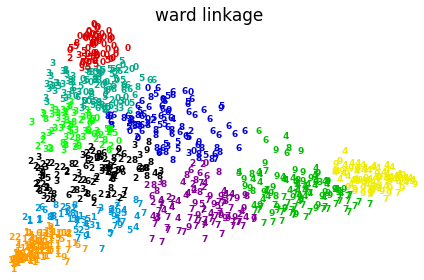

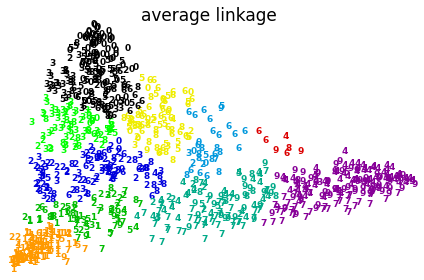

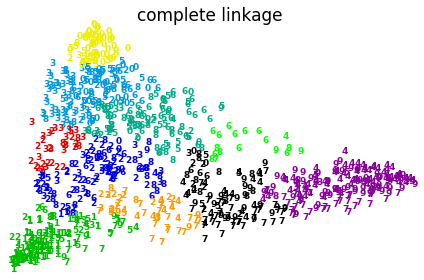

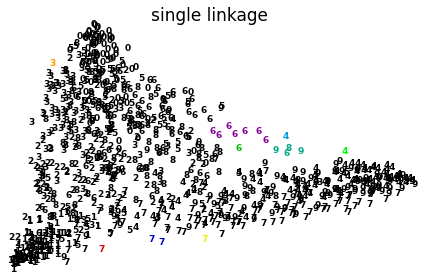

In [16]:
# 2D embedding of the dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X2)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

#### Plot Dendrodram

In [17]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

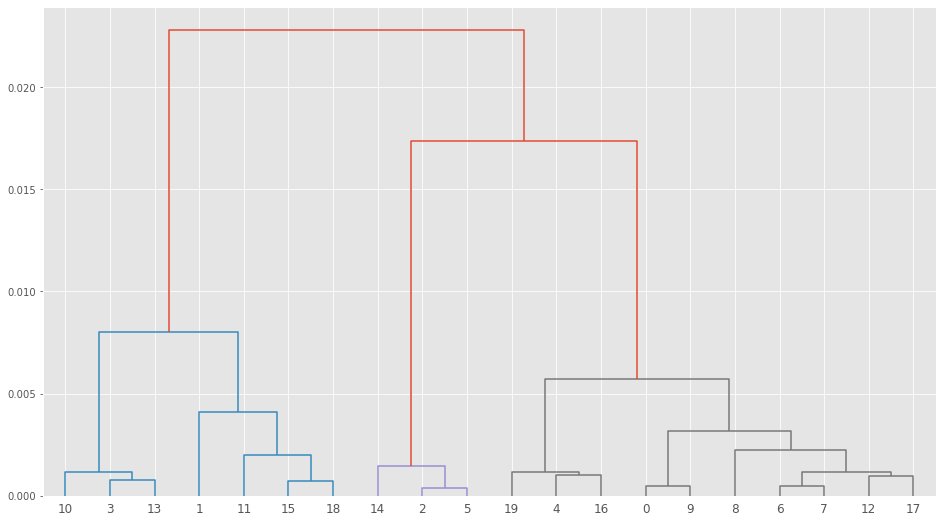

In [18]:
Z = hierarchy.linkage(X_red[:20,:], 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z)